In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('../dataset/ITC.NS.csv')
data.head(5)

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-01-24 09:30:00,339.299988,339.500000,337.750000,337.950012,337.950012,565145
1,2023-01-24 10:00:00,338.100006,340.200012,337.600006,340.049988,340.049988,857259
2,2023-01-24 10:30:00,340.000000,340.649994,339.500000,340.149994,340.149994,1343453
3,2023-01-24 11:00:00,340.200012,340.750000,339.750000,340.100006,340.100006,636284
4,2023-01-24 11:30:00,340.100006,340.250000,339.750000,339.850006,339.850006,367532


In [3]:
data.dtypes

Datetime      object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
data.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data['Datetime']= pd.to_datetime(data['Datetime'], format= '%Y-%m-%d %H:%M:%S')

In [6]:
data['dateDAY']= data['Datetime'].dt.day
data['dateMONTH']= data['Datetime'].dt.month
data['dateYR']= data['Datetime'].dt.year
data['hours']= data['Datetime'].dt.hour
data['min']= data['Datetime'].dt.minute

In [7]:
data

,Datetime,Open,High,Low,Close,Adj Close,Volume,dateDAY,dateMONTH,dateYR,hours,min
0,2023-01-24 09:30:00,339.299988,339.500000,337.750000,337.950012,337.950012,565145,24,1,2023,9,30
1,2023-01-24 10:00:00,338.100006,340.200012,337.600006,340.049988,340.049988,857259,24,1,2023,10,0
2,2023-01-24 10:30:00,340.000000,340.649994,339.500000,340.149994,340.149994,1343453,24,1,2023,10,30
3,2023-01-24 11:00:00,340.200012,340.750000,339.750000,340.100006,340.100006,636284,24,1,2023,11,0
4,2023-01-24 11:30:00,340.100006,340.250000,339.750000,339.850006,339.850006,367532,24,1,2023,11,30
...,...,...,...,...,...,...,...,...,...,...,...,...
727,2023-04-26 13:00:00,411.049988,412.000000,410.799988,411.950012,411.950012,598070,26,4,2023,13,0
728,2023-04-26 13:30:00,411.950012,412.950012,411.000000,411.399994,411.399994,761295,26,4,2023,13,30
729,2023-04-26 14:00:00,411.450012,411.850006,410.799988,411.250000,411.250000,423222,26,4,2023,14,0
730,2023-04-26 14:30:00,411.299988,411.649994,411.149994,411.500000,411.500000,297869,26,4,2023,14,30


In [8]:
data2= data.copy()
data2.head(5)

,Datetime,Open,High,Low,Close,Adj Close,Volume,dateDAY,dateMONTH,dateYR,hours,min
0,2023-01-24 09:30:00,339.299988,339.500000,337.750000,337.950012,337.950012,565145,24,1,2023,9,30
1,2023-01-24 10:00:00,338.100006,340.200012,337.600006,340.049988,340.049988,857259,24,1,2023,10,0
2,2023-01-24 10:30:00,340.000000,340.649994,339.500000,340.149994,340.149994,1343453,24,1,2023,10,30
3,2023-01-24 11:00:00,340.200012,340.750000,339.750000,340.100006,340.100006,636284,24,1,2023,11,0
4,2023-01-24 11:30:00,340.100006,340.250000,339.750000,339.850006,339.850006,367532,24,1,2023,11,30


In [9]:
data2.drop(['Datetime', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [10]:
data2.head(2)

,Open,High,Low,Close,dateDAY,dateMONTH,dateYR,hours,min
0,339.299988,339.500000,337.750000,337.950012,24,1,2023,9,30
1,338.100006,340.200012,337.600006,340.049988,24,1,2023,10,0


In [11]:
features= data2.drop(['High', 'Low', 'Close'], axis=1)
labels= data2.drop(['Open', 'dateDAY', 'dateMONTH', 'dateYR', 'hours', 'min'], axis=1)

In [51]:
from sklearn.model_selection import train_test_split
featuresTrain, featuresTest, labelsTrain, labelsTest= train_test_split(features, labels, test_size= .1, random_state= 42)

In [52]:
print("shape of features: ", features.shape)
print("shape of labels: ", labels.shape)

shape of features:  (732, 6)
shape of labels:  (732, 3)


# Model Building and Exploration

In [14]:
import tensorflow as tf
from tensorflow import keras

In [45]:
base_mdl= keras.models.load_model('../model/exports/itcStockPred(v2)/')

In [100]:
model= keras.models.Sequential([
    base_mdl,
    keras.layers.Dense(1450, activation= tf.keras.activations.relu, input_shape= (features.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(356, activation=tf.keras.activations.relu),
    keras.layers.Dense(3, activation= tf.keras.activations.relu)
])

In [101]:
model.layers[0].trainable= False

In [102]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 3)                 2383691   
                                                                 
 dense_30 (Dense)            (None, 1450)              5800      
                                                                 
 dropout_10 (Dropout)        (None, 1450)              0         
                                                                 
 dense_31 (Dense)            (None, 356)               516556    
                                                                 
 dense_32 (Dense)            (None, 3)                 1071      
                                                                 
Total params: 2,907,118
Trainable params: 523,427
Non-trainable params: 2,383,691
_________________________________________________________________


In [103]:
model.compile(optimizer= 'adam', loss= keras.losses.mean_absolute_error, metrics=['accuracy'])

In [104]:
model.fit(featuresTrain, labelsTrain, epochs= 10)

Epoch 1/10
21/21 [==============================] - 1s 11ms/step - loss: 86.9667 - accuracy: 0.3267
Epoch 2/10
21/21 [==============================] - 0s 4ms/step - loss: 22.5409 - accuracy: 0.3267
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 20.3642 - accuracy: 0.4058
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 18.5054 - accuracy: 0.3404
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 18.1486 - accuracy: 0.3891
Epoch 6/10
21/21 [==============================] - 0s 4ms/step - loss: 20.0617 - accuracy: 0.4179
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 16.8213 - accuracy: 0.3207
Epoch 8/10
21/21 [==============================] - 0s 5ms/step - loss: 16.3288 - accuracy: 0.4316
Epoch 9/10
21/21 [==============================] - 0s 4ms/step - loss: 16.6455 - accuracy: 0.4088
Epoch 10/10
21/21 [==============================] - 0s 7ms/step - loss: 15.3680 - accuracy: 0.3891


In [68]:
for layer in model.layers:
    intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                                     outputs=layer.output)
    intermediate_output = intermediate_layer_model.predict(featuresTest)
    print(layer.name)
    print(intermediate_output)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name='dense_7_input'), name='dense_7_input', description="created by layer 'dense_7_input'") at layer "dense_7". The following previous layers were accessed without issue: []

In [69]:
model.evaluate(featuresTest, labelsTest)

3/3 [==============================] - 0s 9ms/step - loss: 128.9153 - accuracy: 1.0000


[128.915283203125, 1.0]

In [63]:
def predFunc(openPrice, day, month, year, model=model):
    inputArray = np.array([[openPrice, day, month, year]], dtype='float')
    prediction = model.predict(inputArray)
    return print(f"Computed Predictions for ITC Limited on {day}/{month}/{year}.............\n"
                 f"High: {prediction[0][0]}\nLow: {prediction[0][1]}\nClose: {prediction[0][2]}")

In [74]:
predFunc(400.3, 21, 4, 2023)

1/1 [==============================] - 0s 26ms/step
Computed Predictions for ITC Limited on 21/4/2023.............
High: 404.1607666015625
Low: 396.3700866699219
Close: 400.2817687988281


In [66]:
model.predict([[400.3, 21, 3, 2023]])

1/1 [==============================] - 0s 31ms/step


array([[404.17944, 396.38275, 400.29514]], dtype=float32)

In [105]:
predictions= base_mdl.predict(features)

23/23 [==============================] - 0s 4ms/step


In [106]:
predDF= pd.DataFrame(predictions, columns=['highPred', 'lowPred', 'closePred'])
predDF.head(2)

,highPred,lowPred,closePred
0,343.148865,336.180176,341.403290
1,341.088867,334.152222,339.386108


In [25]:
#model.save(f"../exports/itcStockPred(v2)")

# Comparison between actual and predicted values

In [26]:
import seaborn as sns

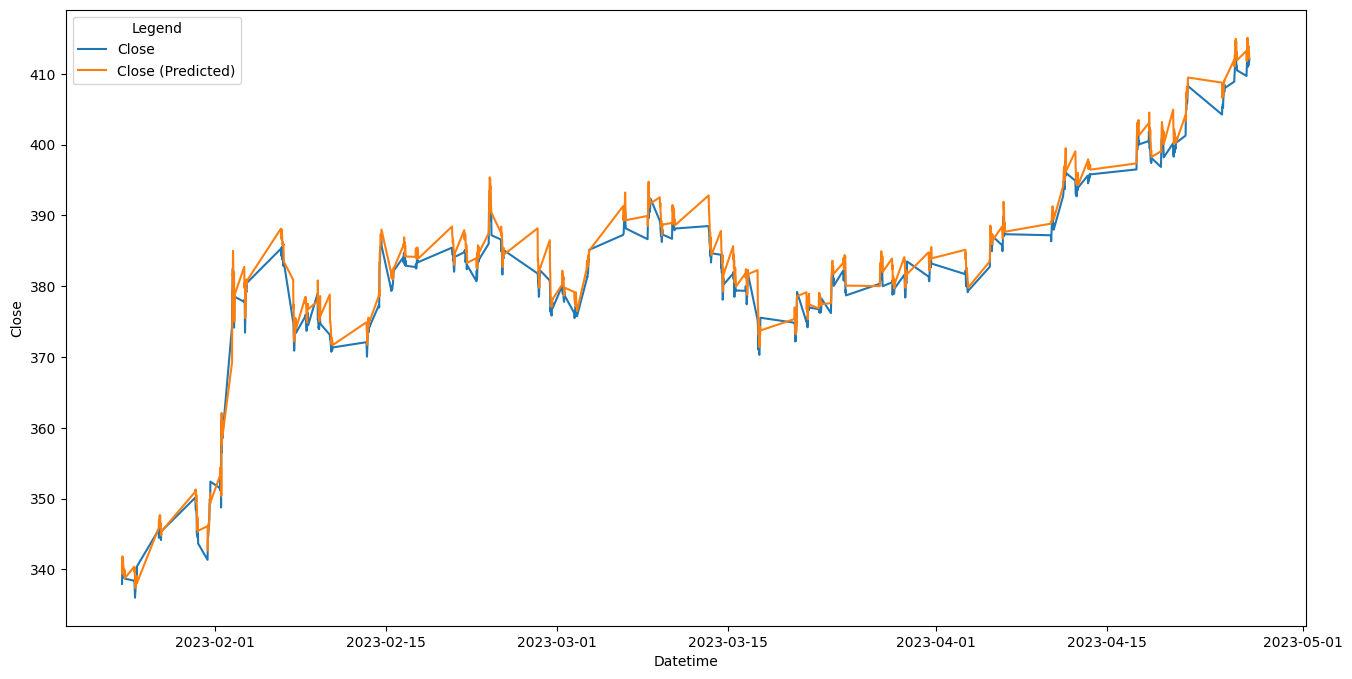

In [107]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['Datetime'], y=labels['Close'], label= 'Close')
sns.lineplot(x=data['Datetime'], y=predDF['closePred'], label= 'Close (Predicted)')
plt.legend(title= 'Legend')
plt.show()

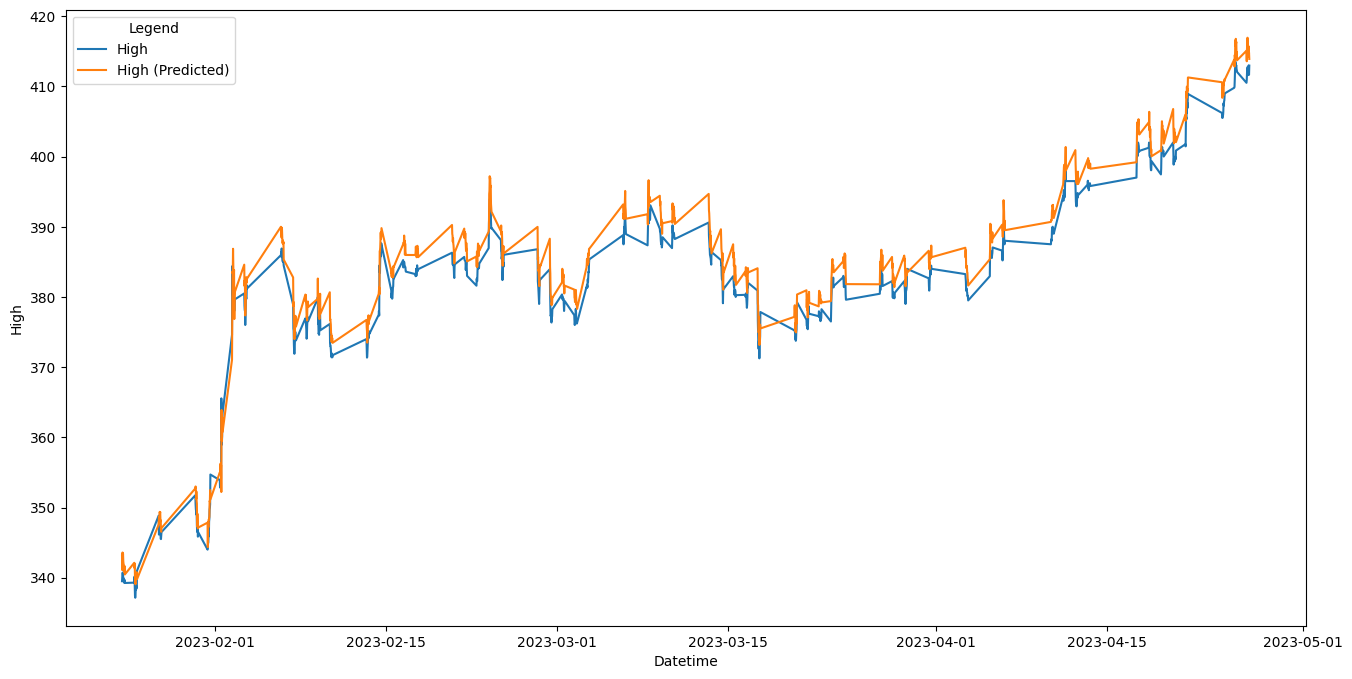

In [109]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['Datetime'], y=labels['High'], label= 'High')
sns.lineplot(x=data['Datetime'], y=predDF['highPred'], label= 'High (Predicted)')
plt.legend(title= 'Legend')
plt.show()

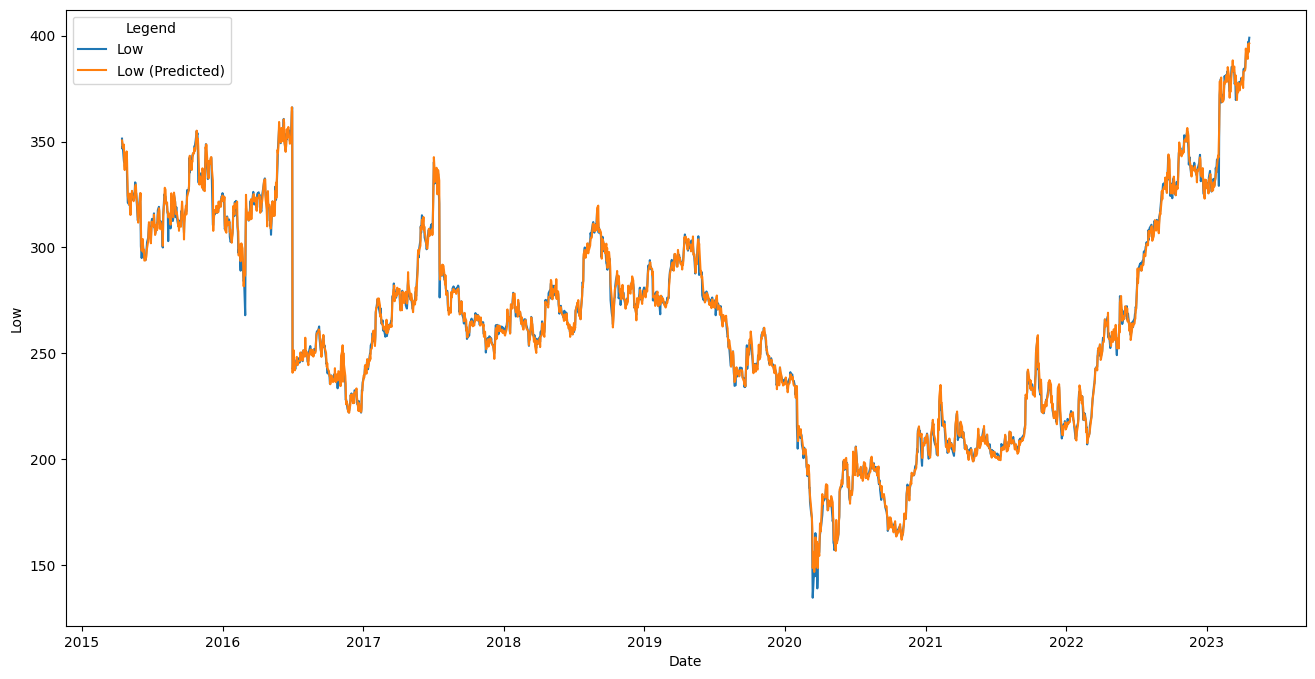

In [72]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['Date'], y=labels['Low'], label= 'Low')
sns.lineplot(x=data['Date'], y=predDF['lowPred'], label= 'Low (Predicted)')
plt.legend(title= 'Legend')
plt.show()